<a href="https://colab.research.google.com/github/mouleenajaiswal1/CapstoneProject_3/blob/main/Credit_Card_Default_Prediction__Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


# **Spiliting Dataset into training and test set.**

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Import important libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
credit_data= pd.read_excel("/content/drive/MyDrive/Capstone Project 3/default of credit card clients.xls")

In [5]:
credit_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Let's rename some columns for better convinience

In [6]:
credit_data.rename(columns={'Unnamed: 0': 'ID', 'X1': 'LIMIT_BAL','X2':'SEX','X3':'EDUCATION','X4':'MARRIAGE','X5':'AGE','X6':'PAY_1', 'X7':'PAY_2', 'X8':'PAY_3', 'X9':'PAY_4',
       'X10':'PAY_5', 'X11':'PAY_6', 'X12':'BILL_AMT1', 'X13':'BILL_AMT2', 'X14':'BILL_AMT3', 'X15':'BILL_AMT4', 'X16':'BILL_AMT5', 'X17':'BILL_AMT6', 'X18':'PAY_AMT1', 'X19':'PAY_AMT2',
       'X20':'PAY_AMT3', 'X21':'PAY_AMT4', 'X22':'PAY_AMT5', 'X23':'PAY_AMT6', 'Y':'def_pay'}, inplace=True)

In [7]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [8]:
#Remove first row
credit_data = credit_data.iloc[1: , :]

In [9]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,30000,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [11]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  object
 1   LIMIT_BAL  30000 non-null  object
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  object
 6   PAY_1      30000 non-null  object
 7   PAY_2      30000 non-null  object
 8   PAY_3      30000 non-null  object
 9   PAY_4      30000 non-null  object
 10  PAY_5      30000 non-null  object
 11  PAY_6      30000 non-null  object
 12  BILL_AMT1  30000 non-null  object
 13  BILL_AMT2  30000 non-null  object
 14  BILL_AMT3  30000 non-null  object
 15  BILL_AMT4  30000 non-null  object
 16  BILL_AMT5  30000 non-null  object
 17  BILL_AMT6  30000 non-null  object
 18  PAY_AMT1   30000 non-null  object
 19  PAY_AMT2   30000 non-null  object
 20  PAY_AMT3   30000 non-null  o

Check number of rows and columns in our dataset.

In [12]:
print("Number of rows is: ", credit_data.shape[0])
print("Number of columns is: ",credit_data.shape[1])

Number of rows is:  30000
Number of columns is:  25


Check if we have any null values.

In [13]:
credit_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

There is no NAN/NULL values in our dataset.

# **Exploratory data Analysis**

# **Univariate Analysis**

**Dependent Variable**

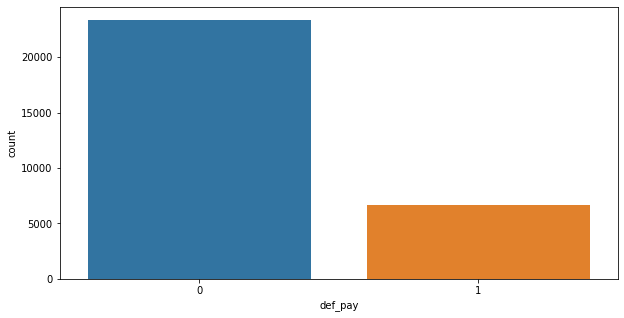

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'def_pay', data = credit_data)
plt.show()

* We can see that the dataset consists of more than 20000 clients who are not 
expected to default payment whereas around 5300 clients are expected to default the payment.
* Here ,there is huge difference between non-defaulter(0) and defaulter(1)

**Independent Variable**

**SEX,EDUCATION,MARRIAGE, PAY_SEPT, PAY_AUG,
       PAY_JUL, PAY_JUN, PAY_MAY, PAY_APR**





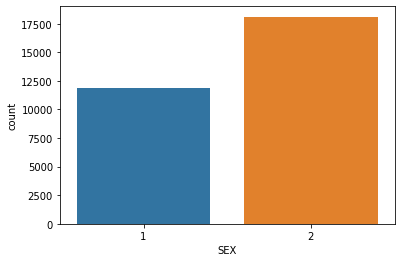

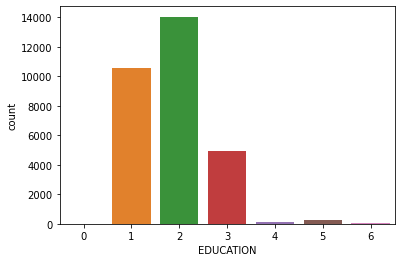

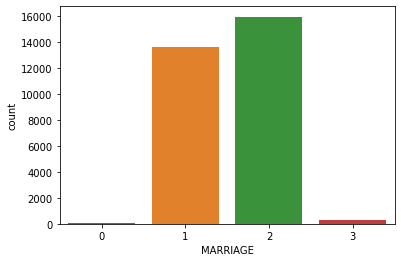

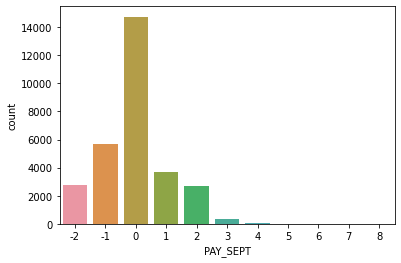

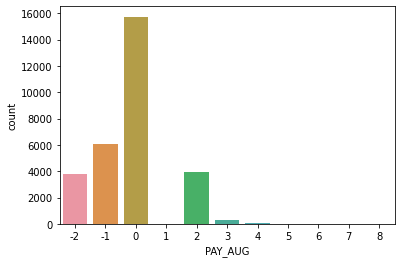

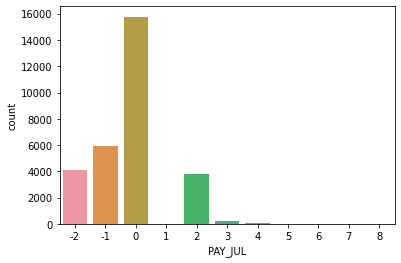

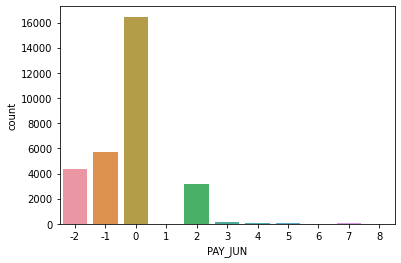

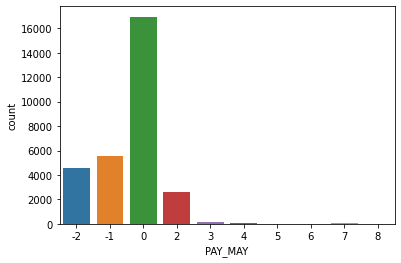

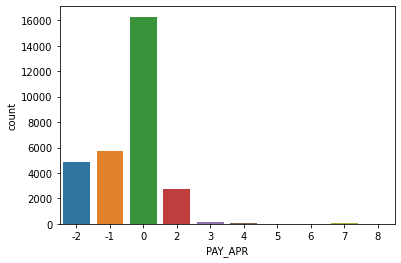

In [15]:
credit_data.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG',
       'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for i in columns:
    sns.countplot(credit_data[i])
    plt.xticks(rotation = 0)
    plt.show()

 From above plot:
*   Number of Male credit holder(represented as 1) is less than Female(represented as 2).
*   More number of credit holders are university students(represented as 2) followed by Graduates(represented as 1) and then High school students(represented as 3).Here 0, 4, 5, and 6  can be treated as other.
*   1 - married,2 - single,0 and 3 - others.More number of credit cards holder are Single.
*   Mostly ,Payment are not due(0) for april to september.








In [16]:
credit_data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
21      67
60      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
74       1
79       1
Name: AGE, dtype: int64

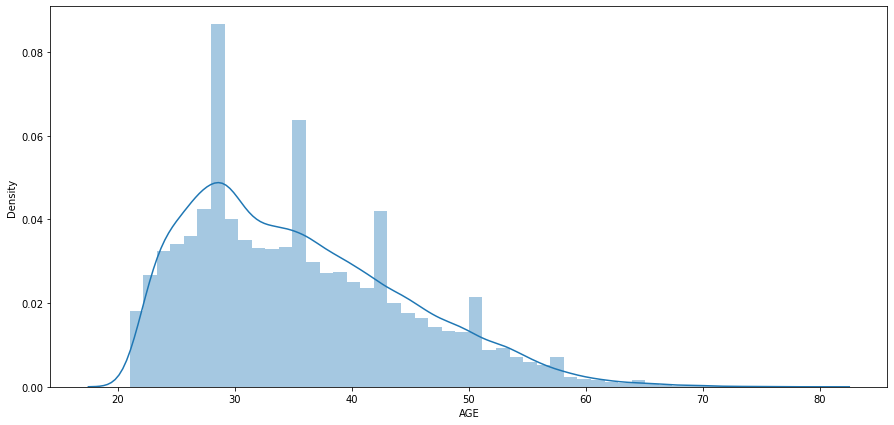

In [17]:
plt.figure(figsize=(15,7))
sns.distplot( credit_data['AGE'] )
plt.show()

*   We can see more number of credit cards holder age are between 26-30 years old.
*   Age above 60 years old rarely uses the credit card.



In [18]:
credit_data['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
1000000       1
690000        1
760000        1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

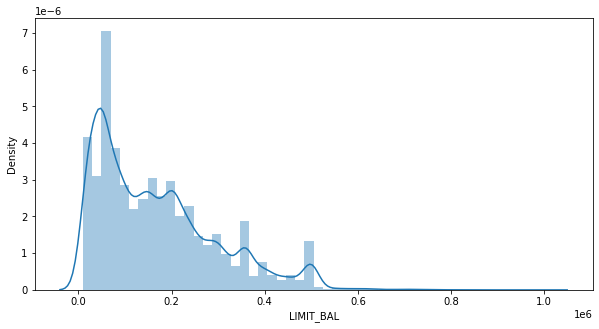

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(credit_data['LIMIT_BAL'], kde=True)
plt.show()

* Maximum amount of given credit in NT dollars is 50,000 followed by 20,000 and 30,000.

#**Bivariate Analysis**

**Sex and Def_Pay**

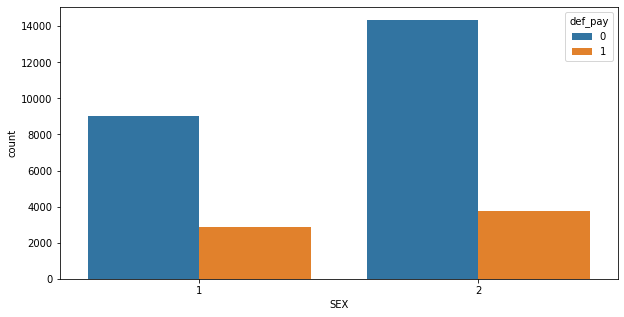

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', hue = 'def_pay', data = credit_data)
plt.show()

* It is evident from the above graph that the number of defaulter have high proportion of females.

**Education and Def_Pay**

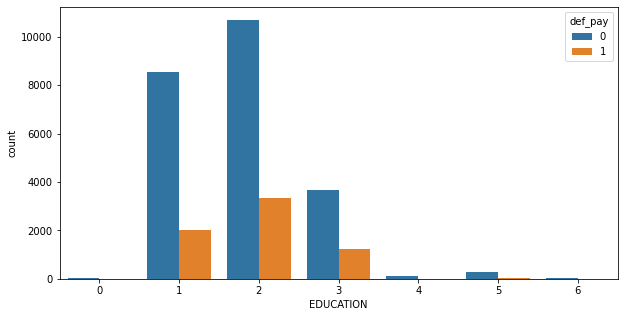

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', hue = 'def_pay', data = credit_data)
plt.show()

* From the above plot it is clear that those people who are high school students have less default payment wrt graduates and university people

**Marriage and Def_Pay**

In [22]:
credit_data.groupby('def_pay')['MARRIAGE'].value_counts()

def_pay  MARRIAGE
0        2           12623
         1           10453
         3             239
         0              49
1        2            3341
         1            3206
         3              84
         0               5
Name: MARRIAGE, dtype: int64

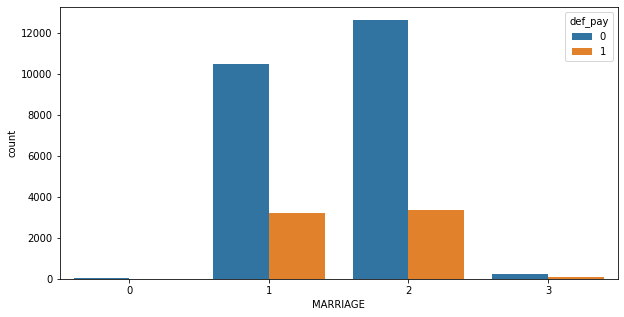

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', hue = 'def_pay', data = credit_data)
plt.show()

* Most Number of defaulters are single people.

**Age and Def_Pay**

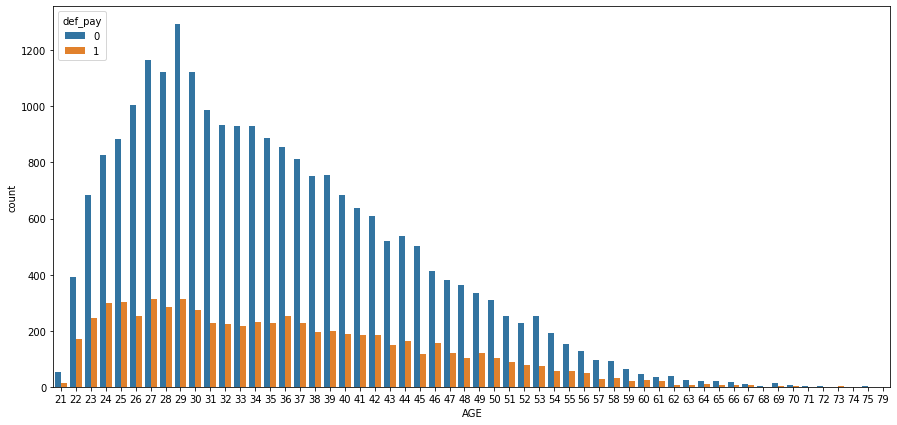

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', hue = 'def_pay', data = credit_data)
plt.show()

* Most number of defaulters are between the age of 25-30 years old.

**Boxplot analysis to check the outliers**

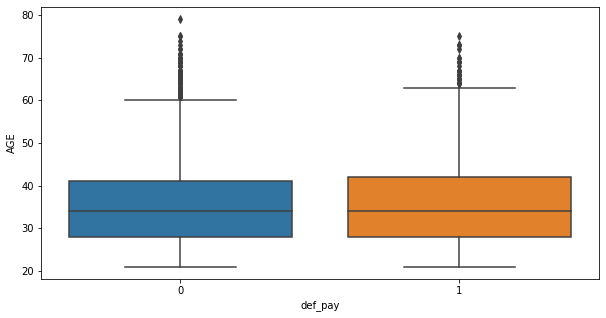

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',y='AGE',data=credit_data)
plt.show()

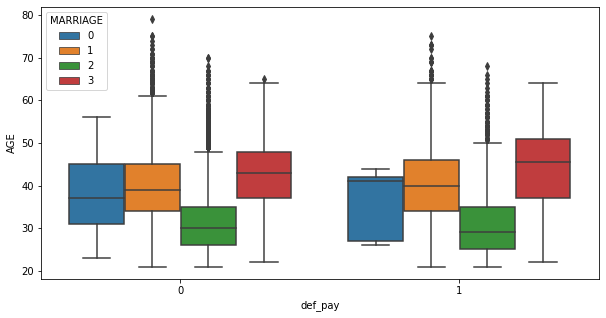

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue= 'MARRIAGE', y='AGE', data=credit_data)
plt.show()

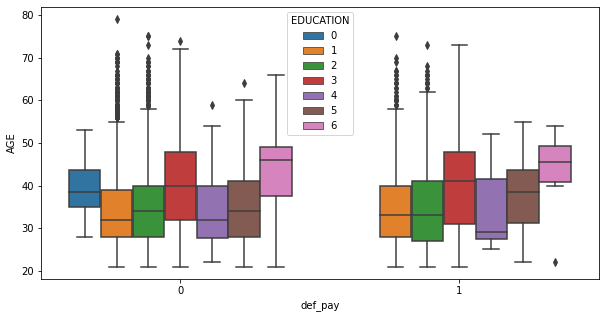

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=credit_data)
plt.show()

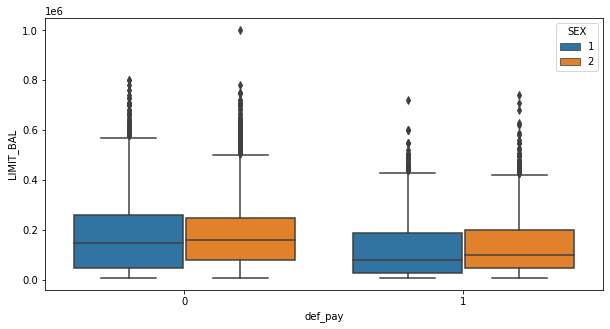

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue='SEX', y='LIMIT_BAL',data=credit_data)
plt.show()

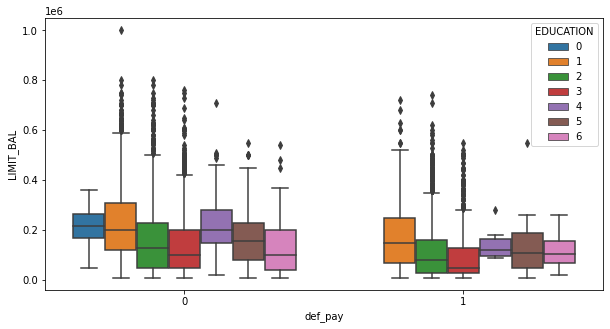

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue='EDUCATION', y='LIMIT_BAL',data=credit_data)
plt.show()

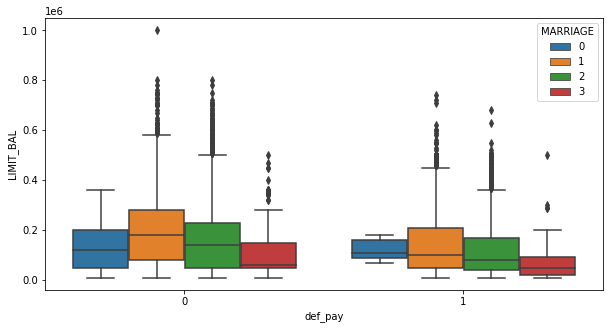

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue='MARRIAGE', y='LIMIT_BAL',data=credit_data)
plt.show()

# **Feature Engineering**

In [31]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             30000 non-null  object
 1   LIMIT_BAL      30000 non-null  object
 2   SEX            30000 non-null  object
 3   EDUCATION      30000 non-null  object
 4   MARRIAGE       30000 non-null  object
 5   AGE            30000 non-null  object
 6   PAY_SEPT       30000 non-null  object
 7   PAY_AUG        30000 non-null  object
 8   PAY_JUL        30000 non-null  object
 9   PAY_JUN        30000 non-null  object
 10  PAY_MAY        30000 non-null  object
 11  PAY_APR        30000 non-null  object
 12  BILL_AMT_SEPT  30000 non-null  object
 13  BILL_AMT_AUG   30000 non-null  object
 14  BILL_AMT_JUL   30000 non-null  object
 15  BILL_AMT_JUN   30000 non-null  object
 16  BILL_AMT_MAY   30000 non-null  object
 17  BILL_AMT_APR   30000 non-null  object
 18  PAY_AMT_SEPT   30000 non-n

In [32]:
credit_data=credit_data.astype("int64")

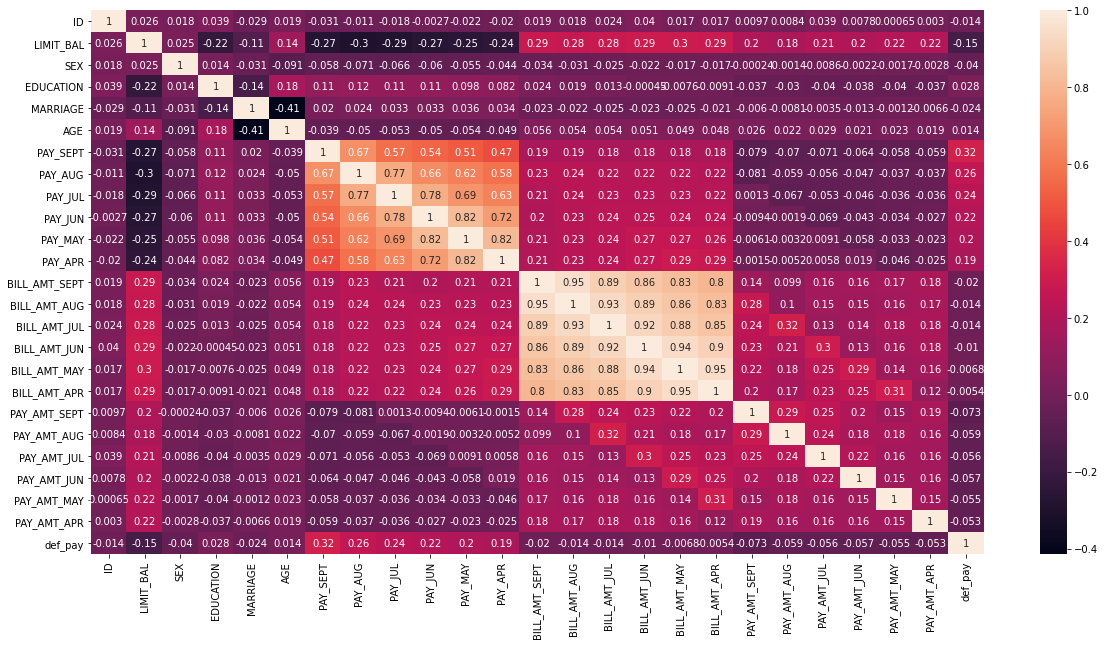

In [33]:
plt.figure(figsize=(20,10))
correlation=credit_data.corr()
sns.heatmap(correlation,annot=True)


* ID is unimportant and it has no role in prediction so we will remove it.

In [34]:
credit_data.drop(['ID'], axis=1, inplace=True)

In [35]:
credit_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,def_pay
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can be put in a 'Other' cathegory as 4.

In [36]:
credit_data['EDUCATION']= credit_data['EDUCATION'].apply(lambda x:4 if x in [5,6,0] else x)
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

We identify MARRIAGE  as nominal variables, which means there is no intrinsic ordering to the categories.MARRIAGE should have 3 values according to data description. However, an unexpected variable 0 takes place. We decided to merge value 0 into value 3, which stands for 'other'. 

In [37]:
credit_data['MARRIAGE'] = credit_data['MARRIAGE'].apply(lambda x:3 if x==0 else x )
credit_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

**ONE HOT ENCODING**

In [38]:
credit_data = pd.get_dummies(credit_data,columns=['EDUCATION','MARRIAGE'])

In [39]:
credit_data.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,def_pay,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,1,0,0


Let's remove the columns that are unimportant for further analysis.

In [40]:
credit_data.drop(['EDUCATION_4','MARRIAGE_3'],axis = 1, inplace = True)

In [41]:
credit_data.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,def_pay,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2
1,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,1
3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,1
4,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,1,0
5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,1,0


**Feature Scaling of Numerical Features**

In [42]:
#Apply z-score
X= credit_data.drop(['def_pay'], axis = 1)
y= credit_data.def_pay

X = X.apply(lambda x : (x-np.mean(x))/np.std(x))

In [43]:
X.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2
1,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.738375,1.0669,-0.442752,1.093780,-1.066471
2,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.738375,1.0669,-0.442752,-0.914261,0.937672
3,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.738375,1.0669,-0.442752,-0.914261,0.937672
4,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.738375,1.0669,-0.442752,1.093780,-1.066471
5,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.738375,1.0669,-0.442752,1.093780,-1.066471


In [44]:
y.head()

1    1
2    1
3    0
4    0
5    0
Name: def_pay, dtype: int64

# **SMOTE**

In [45]:

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(credit_data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 1)

In [47]:
print(X_train.shape)
print(X_test.shape)

(32709, 26)
(14019, 26)


# **Applying Machine Learning Algorithm for Classification Problem**

# **Logistic Regression**

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] }

logistic_model= GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    9.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [49]:
logistic_model.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
logistic_model.score(X_train, y_train)

0.6756855911217097

In [51]:
y_pred_logistic_train = logistic_model.predict(X_train)

In [52]:
y_pred_logistic_test = logistic_model.predict(X_test)

# **Model Evaluation**

In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [54]:
logistic_train_accuracy= accuracy_score(y_train, y_pred_logistic_train)
logistic_test_accuracy= accuracy_score(y_test, y_pred_logistic_test)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.6756855911217097
The accuracy on test data is  0.6706612454526001


In [55]:
logistic_test_precision= precision_score(y_test, y_pred_logistic_test)
logistic_test_recall= recall_score(y_test, y_pred_logistic_test)
logistic_test_f1score= f1_score(y_test, y_pred_logistic_test)
logistic_test_roc_auc= roc_auc_score(y_test, y_pred_logistic_test)
logistic_test_confusion_matrix= confusion_matrix(y_test, y_pred_logistic_test)

In [56]:
model_results = pd.DataFrame([['Logistic Regression', logistic_test_accuracy, logistic_test_precision, logistic_test_recall, 
                         logistic_test_f1score, logistic_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.670661,0.67507,0.657436,0.666136,0.670655


**Confusion Matrix**

In [57]:
print(logistic_test_confusion_matrix)

[[4796 2217]
 [2400 4606]]


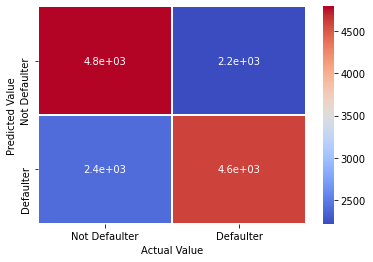

In [58]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(logistic_test_confusion_matrix, annot= True,linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **Stochastic Gradient Descent**

In [59]:
from sklearn.linear_model import SGDClassifier

sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0]}

sgd_model = GridSearchCV(SGDClassifier(class_weight='balanced'), param_grid=sgd_params, scoring='accuracy', cv=3, n_jobs=-1)
sgd_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [60]:
sgd_model.best_estimator_

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
sgd_model.best_params_

{'alpha': 0.01}

In [62]:
sgd_model.score(X_train, y_train)

0.6851631049558226

In [63]:
y_pred_sgd_train = sgd_model.predict(X_train)
y_pred_sgd_test = sgd_model.predict(X_test)

# **Model Evaluation**

In [64]:
sgd_train_accuracy= accuracy_score(y_train, y_pred_sgd_train)
sgd_test_accuracy= accuracy_score(y_test, y_pred_sgd_test)

print("The accuracy on train data is ", sgd_train_accuracy)
print("The accuracy on test data is ", sgd_test_accuracy)

The accuracy on train data is  0.6851631049558226
The accuracy on test data is  0.6780797489121906


In [65]:
sgd_test_precision= precision_score(y_test, y_pred_sgd_test)
sgd_test_recall= recall_score(y_test, y_pred_sgd_test)
sgd_test_f1score= f1_score(y_test, y_pred_sgd_test)
sgd_test_roc_auc= roc_auc_score(y_test, y_pred_sgd_test)
sgd_test_confusion_matrix= confusion_matrix(y_test, y_pred_sgd_test)

In [66]:
model = pd.DataFrame([['Stochastic Gradient Descent', sgd_test_accuracy, sgd_test_precision, sgd_test_recall, 
                         sgd_test_f1score, sgd_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.670661,0.675070,0.657436,0.666136,0.670655
1,Stochastic Gradient Descent,0.678080,0.738747,0.550528,0.630899,0.678016


**Confusion Matrix**

In [67]:
print(sgd_test_confusion_matrix)

[[5649 1364]
 [3149 3857]]


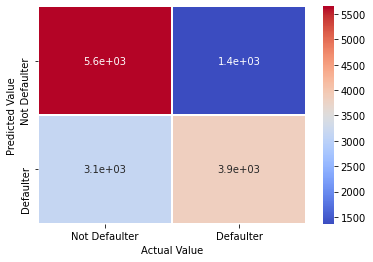

In [68]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(sgd_test_confusion_matrix, annot= True,linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **KNN**

In [69]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
param_knn = {'n_neighbors':range(1,10)}

In [70]:
grid_knn_org = GridSearchCV(knn,param_knn, n_jobs= -1)
grid_knn_org.fit(X_train, y_train)
knn_pred_train = grid_knn_org.predict(X_train)
knn_pred_test = grid_knn_org.predict(X_test)

# **Model Evaluation**

In [71]:
knn_train_accuracy= accuracy_score(y_train, knn_pred_train)
knn_test_accuracy= accuracy_score(y_test,knn_pred_test )

print("The accuracy on train data is ", knn_train_accuracy)
print("The accuracy on test data is ", knn_test_accuracy)

The accuracy on train data is  0.9996025558714727
The accuracy on test data is  0.8319423639346601


In [72]:
knn_test_precision= precision_score(y_test, knn_pred_test)
knn_test_recall= recall_score(y_test, knn_pred_test)
knn_test_f1score= f1_score(y_test, knn_pred_test)
knn_test_roc_auc= roc_auc_score(y_test, knn_pred_test)
knn_test_confusion_matrix= confusion_matrix(y_test, knn_pred_test)

In [73]:
model = pd.DataFrame([['K Nearest Neighbor', knn_test_accuracy, knn_test_precision, knn_test_recall, 
                         knn_test_f1score, knn_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.670661,0.675070,0.657436,0.666136,0.670655
1,Stochastic Gradient Descent,0.678080,0.738747,0.550528,0.630899,0.678016
2,K Nearest Neighbor,0.831942,0.781205,0.921924,0.845751,0.831987


**Confusion Matrix**

In [74]:
print(knn_test_confusion_matrix)

[[5204 1809]
 [ 547 6459]]


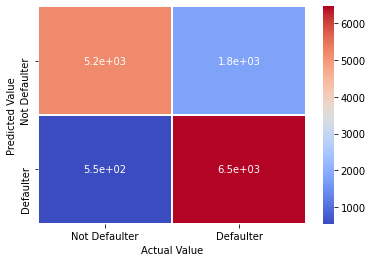

In [75]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(knn_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **Decision Tree Classifier**

In [76]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10],
              }

dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid= parameters, scoring = 'accuracy', cv=3, n_jobs=-1)
dt_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                        

In [77]:
dt_model.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [78]:
dt_model.score(X_train, y_train)

0.7800605337980372

In [79]:
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

In [80]:
dt_train_accuracy= accuracy_score(y_train, y_pred_dt_train)
dt_test_accuracy= accuracy_score(y_test, y_pred_dt_test)

print("The accuracy on train data is ", dt_train_accuracy)
print("The accuracy on test data is ", dt_test_accuracy)

The accuracy on train data is  0.7800605337980372
The accuracy on test data is  0.7497681717668878


In [81]:
dt_test_precision= precision_score(y_test, y_pred_dt_test)
dt_test_recall= recall_score(y_test, y_pred_dt_test)
dt_test_f1score= f1_score(y_test, y_pred_dt_test)
dt_test_roc_auc= roc_auc_score(y_test, y_pred_dt_test)
dt_test_confusion_matrix= confusion_matrix(y_test, y_pred_dt_test)

In [82]:
model = pd.DataFrame([['Decision Tree Classifier', dt_test_accuracy, dt_test_precision, dt_test_recall, 
                         dt_test_f1score, dt_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.670661,0.675070,0.657436,0.666136,0.670655
1,Stochastic Gradient Descent,0.678080,0.738747,0.550528,0.630899,0.678016
2,K Nearest Neighbor,0.831942,0.781205,0.921924,0.845751,0.831987
3,Decision Tree Classifier,0.749768,0.786533,0.685270,0.732418,0.749736


**Confusion Matrix**

In [83]:
print(dt_test_confusion_matrix)

[[5710 1303]
 [2205 4801]]


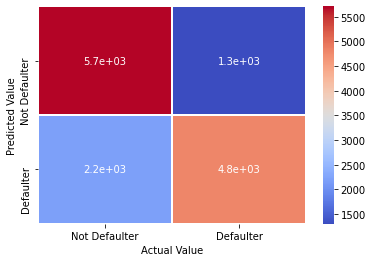

In [84]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(dt_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **Random Forest Classifier**

In [85]:
from sklearn.ensemble import RandomForestClassifier

param = {'n_estimators': [80, 100, 150],
          'criterion': ['entropy', 'gini'],
          'max_depth': [7 ,9, 10],
          'min_samples_split':  [5, 7, 10],
          'min_samples_leaf':  [8, 16, 22]
        }

rf_model= GridSearchCV(RandomForestClassifier(), param_grid= param, scoring='accuracy', cv=3, n_jobs=-1)
rf_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [86]:
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 10,
 'n_estimators': 100}

In [87]:
rf_model.score(X_train, y_train)

0.7906080895166467

In [88]:
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# **Model Evaluation**

In [89]:
rf_train_accuracy= accuracy_score(y_train, y_pred_rf_train)
rf_test_accuracy= accuracy_score(y_test, y_pred_rf_test)

print("The accuracy on train data is ", rf_train_accuracy)
print("The accuracy on test data is ", rf_test_accuracy)

The accuracy on train data is  0.7906080895166467
The accuracy on test data is  0.7641771881018617


In [90]:
rf_test_precision= precision_score(y_test, y_pred_rf_test)
rf_test_recall= recall_score(y_test, y_pred_rf_test)
rf_test_f1score= f1_score(y_test, y_pred_rf_test)
rf_test_roc_auc= roc_auc_score(y_test, y_pred_rf_test)
rf_test_confusion_matrix= confusion_matrix(y_test, y_pred_rf_test)

In [91]:
model = pd.DataFrame([['Random Forest Classifier', rf_test_accuracy, rf_test_precision, rf_test_recall, 
                         rf_test_f1score, rf_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.670661,0.675070,0.657436,0.666136,0.670655
1,Stochastic Gradient Descent,0.678080,0.738747,0.550528,0.630899,0.678016
2,K Nearest Neighbor,0.831942,0.781205,0.921924,0.845751,0.831987
3,Decision Tree Classifier,0.749768,0.786533,0.685270,0.732418,0.749736
4,Random Forest Classifier,0.764177,0.808231,0.692407,0.745849,0.764141


**Confusion Matrix**

In [92]:
print(rf_test_confusion_matrix)

[[5862 1151]
 [2155 4851]]
